Source:
https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python/notebook
<br>
Data :
1. gender_submission : https://www.kaggle.com/c/titanic/download/gender_submission.csv
2. test data         : https://www.kaggle.com/c/titanic/download/test.csv
3. train data        : https://www.kaggle.com/c/titanic/download/train.csv

# 1. Import Data & python packages

In [9]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [10]:
train_df = pd.read_csv("../Data/Titanic/train.csv")

In [11]:
test_df = pd.read_csv("../Data/Titanic/test.csv")

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


# 2. Data quality & Missing values assessment

In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2.1. Age - Missing Values

In [15]:
print('Precent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Precent of missing "Age" records is 19.87%


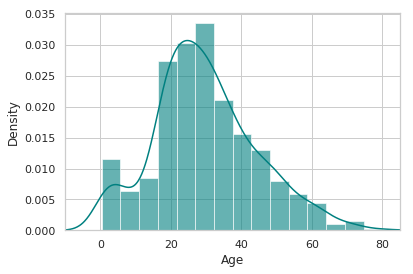

In [16]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

As the "Age" is right skewed, using a the mean might biased results. To deal with this, we will use the median to impute the missing values.

In [17]:
# mean age
print('the mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('the median of the "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

the mean of "Age" is 29.70
the median of the "Age" is 28.00


## 2.2. Cabin - Missing Values

In [18]:
print('Precent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Precent of missing "Cabin" records is 77.10%


The hight quantity of missing values for this featrue make it a not wise idea to use for our model.

## 2.3. Embarked - Missing Values

In [19]:
print('Precent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Precent of missing "Embarked" records is 0.22%


As the number of missing of values is very low 2 examples, we will impute the missing values using the frequent embarked port

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


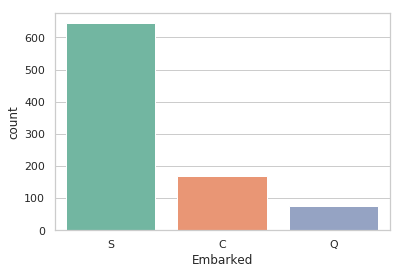

In [20]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')

In [21]:
print("The most common boarding port of embarking is %s." %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarking is S.


We will use the Southhampton to impute the 2 missing values

## 2.4. Final Adjustments to Data (Train & Test)

In [22]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace = True)
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(),inplace = True)
train_data.drop('Cabin',axis=1,inplace=True)

In [23]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


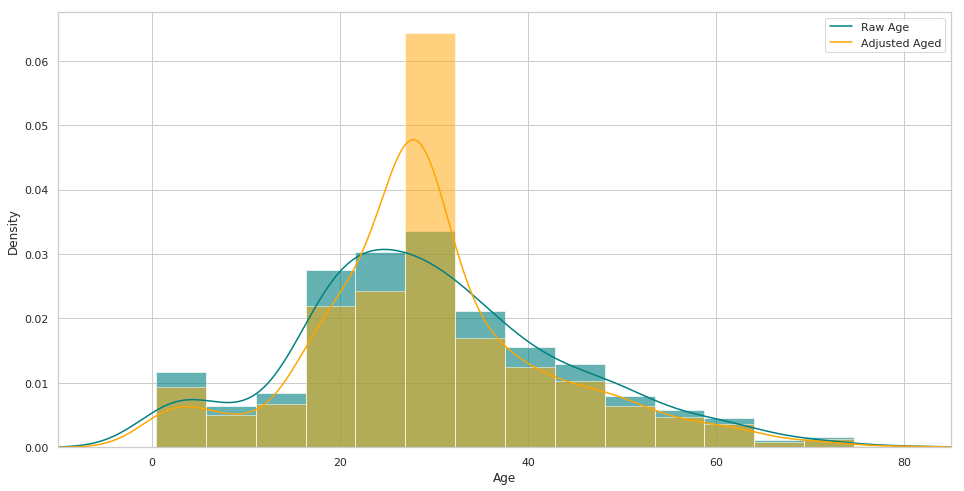

In [25]:
plt.figure(figsize=(16,8))
ax = train_df["Age"].hist(bins=15,density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15,density=True,stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age','Adjusted Aged'])
ax.set(xlabel = 'Age')
plt.xlim(-10,85)
plt.show()

In [26]:
train_data['TravelAlone'] = np.where((train_data["SibSp"]+train_data["Parch"])>0,0,1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [27]:
training = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

In [28]:
final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [29]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


# 3. Exploratory Data Analysis

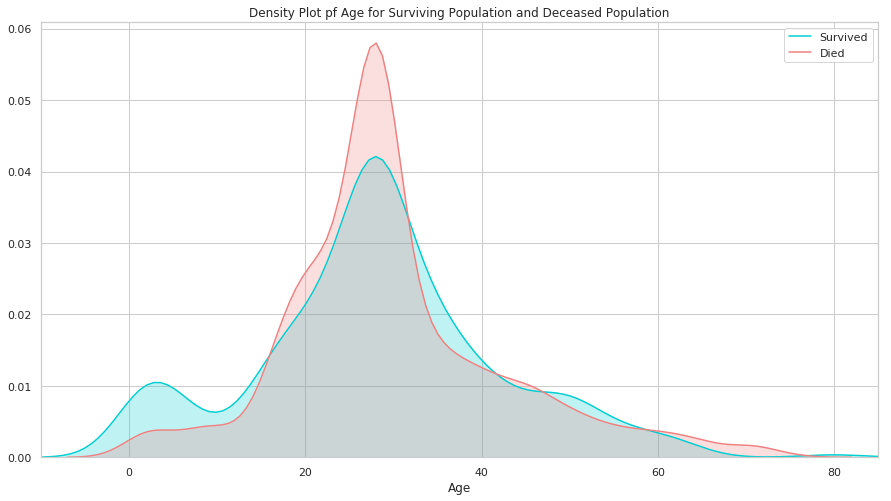

In [30]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0],color="lightcoral", shade=True)
plt.legend(['Survived','Died'])
plt.title('Density Plot pf Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

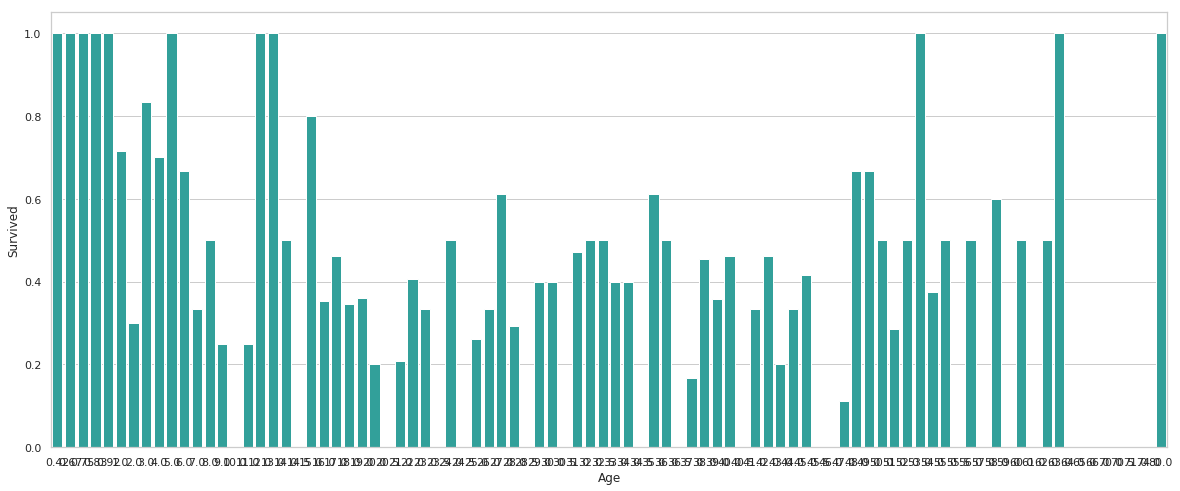

In [31]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age',y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [32]:
final_train['IsMinor'] = np.where(final_train['Age']<=16,1,0)
final_test['IsMinor'] = np.where(final_test['Age']<=16,1,0)

## 3.2. Exploration of Fare

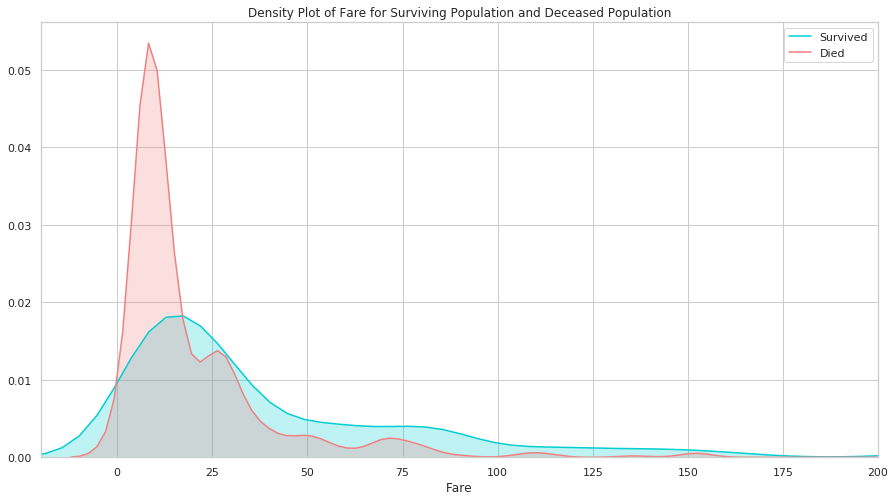

In [33]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train['Fare'][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train['Fare'][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived','Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

## 3.3. Exploration of Passenger Class

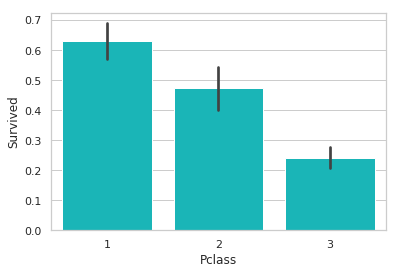

In [34]:
sns.barplot('Pclass','Survived',data=train_df,color="darkturquoise")
plt.show()

being a first class is safer

## 3.4. Exploration of Embarked Port

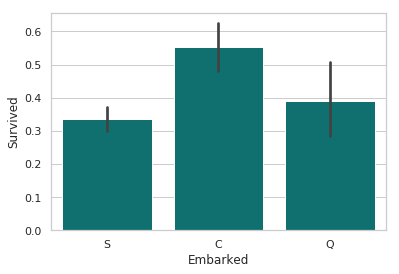

In [35]:
sns.barplot('Embarked','Survived', data=train_df,color="teal")
plt.show()

## 3.5. Exploration of Traveling Alone vs With Family

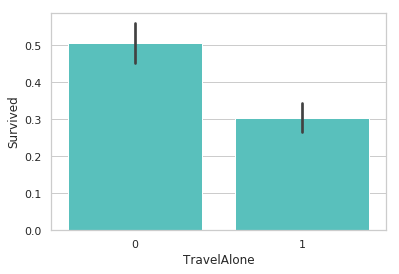

In [36]:
sns.barplot('TravelAlone','Survived',data=final_train, color="mediumturquoise")
plt.show()

individuals traveling without family are likely to die in the disaster than those with family.

## 3.6. Exploration of Gender Variable

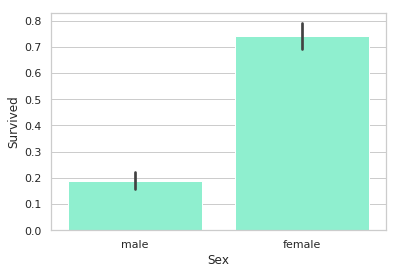

In [37]:
sns.barplot('Sex','Survived',data=train_df,color='aquamarine')
plt.show()

Being a female give you more chances to survive :)

# 4. Logistic Regression and Results

## 4.1. Feature selection

### 4.1.1.  Recursive feature elimination

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['Age','Fare','TravelAlone','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','IsMinor']
X = final_train[cols]
y = final_train['Survived']

model = LogisticRegression()

rfe = RFE(model,8)
rfe = rfe.fit(X,y)

print('Selection feature: %s'%list(X.columns[rfe.support_]))

Selection feature: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


### 4.1.2. Feature ranking with recursive feature elimination and cross-validation

Optimal number of featurs: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


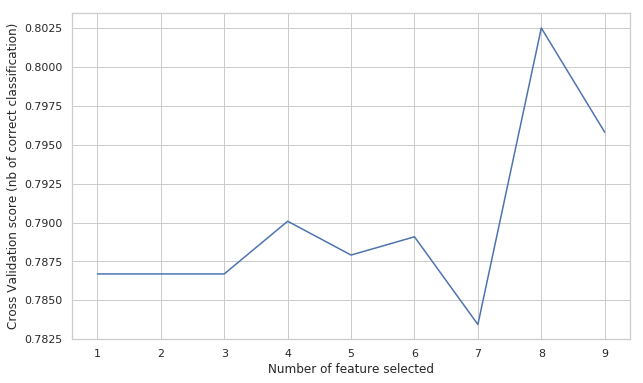

In [39]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X,y)

print('Optimal number of featurs: %d' %rfecv.n_features_)
print('Selected features: %s' %list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of feature selected")
plt.ylabel("Cross Validation score (nb of correct classification)")
plt.plot(range(1,len(rfecv.grid_scores_) +1),rfecv.grid_scores_)
plt.show()

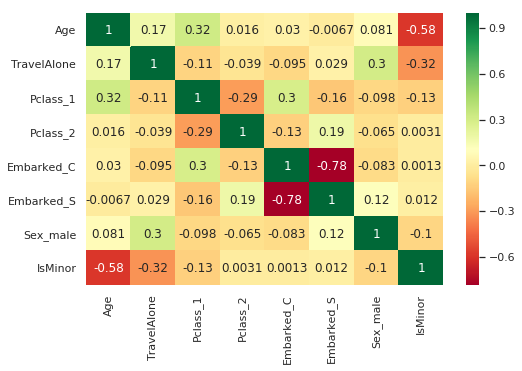

In [40]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8,5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## 4.2. Review of model evaluation procedures

### 4.2.1. Model evaluation based on simple train/test split using train_test_split() function

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.839


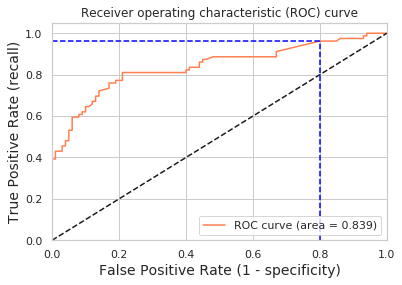

Using a threshold of 0.071 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X = final_train[Selected_features]
y = final_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" %accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" %log_loss(y_test,y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" %auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' %auc(fpr,tpr))
plt.plot([0,1],[0,1],'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### 4.2.2. Model evaluation based on K-fold cross-validation using cross_val_score() function

In [44]:
logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X,y,cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X,y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.802
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850
